# **21차시: 딥러닝 모델 학습**
## 🔍 **학습목표**
- 딥러닝 모델을 학습시키기 위한 **compile**과 **fit** 함수의 역할과 사용법을 이해한다.

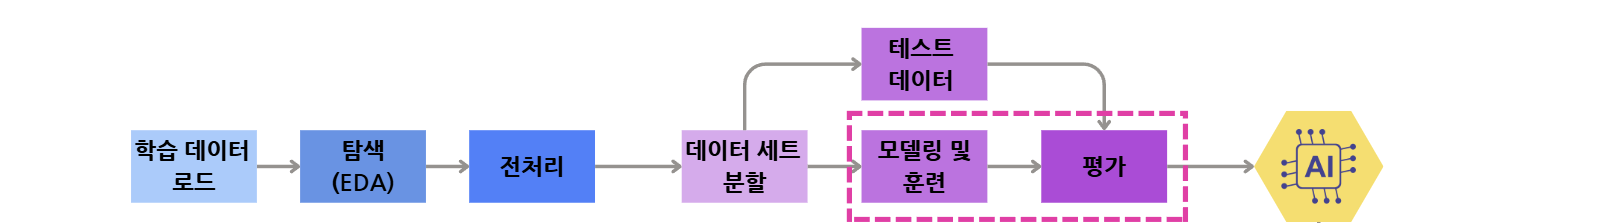


## **📌 딥러닝 모델의 구성과 학습 흐름**


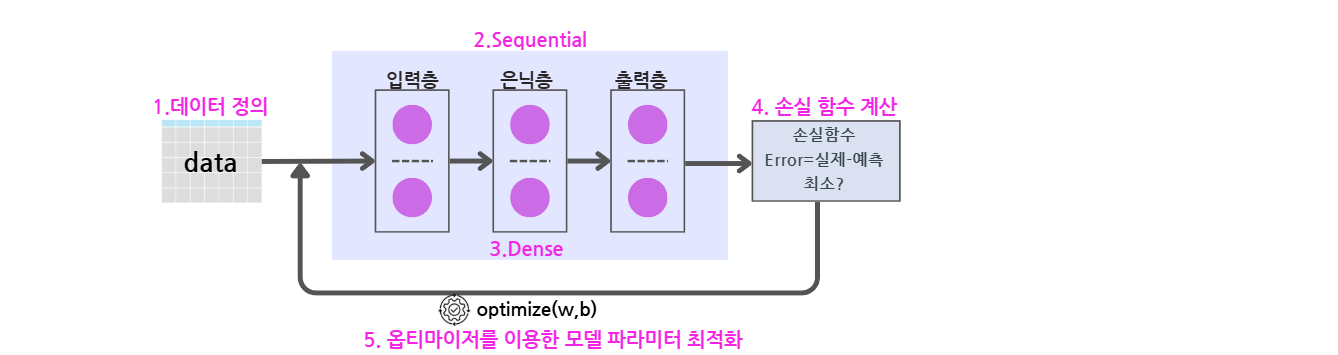

> **4. 손실 함수 계산 (Loss Function)**
> - 모델이 예측한 값과 실제 정답 사이의 차이를 계산합니다
> - 이 오차를 줄이는 방향으로 학습을 반복합니다.
>
> **5. 옵티마이저로 파라미터 조정 (Optimizer)**
> - 오차를 조금씩 고쳐나가야 하는데...
> - 옵티마이저는 이 과정을 자동으로 수행해 줍니다.
>



## **✅model.compile()의 역할과 구성 요소**
- "compile은 모델에게 **'어떻게 학습할지' 알려주는 단계**입니다.
- 손실 함수를 기준으로 오차를 계산하고, 옵티마이저는 그 오차를 줄이는 방향으로 학습을 진행입니다.
- metrics는 그 과정을 옆에서 기록해주는 역할입니다."


- **loss** : 손실 함수, 예측값과 실제값의 차이를 계산하는 기준
    - 회귀:mse, mae , etc
    - 이진분류: binary_crossentropy
    - 다중분류: sparse_categorical_crossentropy (정수형 클래스),categorical_crossentropy(one-hot인코딩)

- **optimizer** : 손실을 줄이기 위해 가중치를 조정하는 방법
    - **Adam**은 대부분의 문제에서 기본값처럼 안정적이고 빠름
    - 하지만 항상 최고는 아니며, 문제에 따라 SGD, RMSprop, Adagrad도 고려
- **metrics** : 학습 과정 중 참고로 출력할 평가 지표
    - 회귀: `'mae'`, `'mse'`
    - 분류: `'accuracy'`, `'precision'`, `'recall'` 등



```python
# 회귀용
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# 이진 분류용
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 다중 분류용:레이블 0,1,2 정수형 라벨 사용시
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 다중 분류용:레이블 원-핫 인코딩으로 표현
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```

## **✅model.fit()의 역할과 구성 요소**

- "fit()"은 모델을 실제로 학습시키는 함수입니다.
- 데이터를 입력받고 여러 번 반복해서 학습하며 점점 오차를 줄여나갑니다.

- **핵심 요소**
    - x_train, y_train : 학습할 데이터
    - epochs : 전체 데이터를 몇 번 반복 학습할지
    - batch_size : 몇 개씩 묶어서 학습할지
    - validation_data : 검증 데이터. 학습 중 과적합을 확인할 수 있음

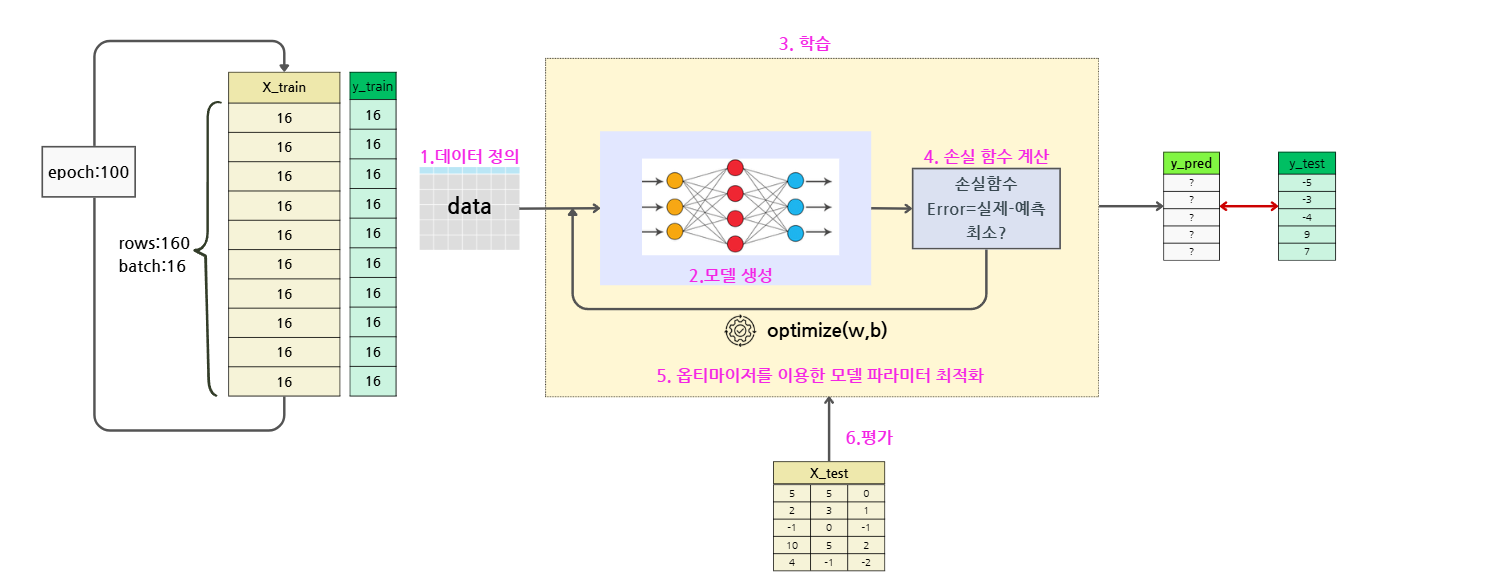

```python
model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test))
```


### **1.회귀**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 학습용 데이터 생성 (공부시간, 집중도 → 시험성적)
df = pd.DataFrame({
    'time': [8, 12, 14, 18, 21, 22, 17, 13, 15, 19],
    'focus': [0.5, 0.7, 0.6, 0.8, 0.9, 0.95, 0.85, 0.7, 0.75, 0.88],
    'score': [69, 82, 83, 91, 93, 98, 92, 87, 89, 94]
})


#feature, label 분리

X = df.drop('score',axis=1)
y = df['score']

#훈련/검증 데이터 분리
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=16, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # 회귀용 출력층

## 학습 방법 설정
model.compile(loss='mse',optimizer='adam',metrics=['mae'])#------->회귀

## 학습
hist = model.fit(x_train, y_train, epochs=10 ,batch_size=5, validation_data=(x_test, y_test))


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - loss: 6845.1533 - mae: 82.5129 - val_loss: 7062.9819 - val_mae: 83.8899
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 6683.0366 - mae: 81.4357 - val_loss: 7038.7578 - val_mae: 83.7475
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 6573.0483 - mae: 80.7665 - val_loss: 7014.1548 - val_mae: 83.6025
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 6556.3286 - mae: 80.6636 - val_loss: 6989.3794 - val_mae: 83.4563
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 6517.8018 - mae: 80.4325 - val_loss: 6964.4849 - val_mae: 83.3092
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 6560.5083 - mae: 80.7013 - val_loss: 6939.5278 - val_mae: 83.1613
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 6481.5625 - mae: 80.2097 - val_loss: 6914.6011 - val_mae: 83.0134
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 6436.4253 - mae: 79.9390 - val_loss: 6889.6499 - val_mae: 82.8651
Epoch 9/10
2/

### **2.이진 분류**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 이진 분류용 데이터 생성 (공부시간, 집중도 → 합격 여부)
df = pd.DataFrame({
    'time': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'focus': [0.3, 0.4, 0.5, 0.6, 0.55, 0.65, 0.7, 0.8, 0.75, 0.85],
    'pass': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

# feature, label 분리
X = df.drop('pass', axis=1)
y = df['pass']

# 훈련/검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류용 출력층

## 학습 방법 설정
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])#------------>이진분류

########모델 학습
hist = model.fit(x_train, y_train, epochs=10 ,batch_size=5, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.4190 - loss: 0.7796 - val_accuracy: 0.3333 - val_loss: 0.8025
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4190 - loss: 0.7682 - val_accuracy: 0.3333 - val_loss: 0.7805
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4190 - loss: 0.7574 - val_accuracy: 0.3333 - val_loss: 0.7602
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.4857 - loss: 0.7247 - val_accuracy: 0.3333 - val_loss: 0.7427
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4857 - loss: 0.7161 - val_accuracy: 0.3333 - val_loss: 0.7265
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.4190 - loss: 0.7161 - val_accuracy: 0.3333 - val_loss: 0.7109
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4857 - loss: 0.7012 - val_accuracy: 0.0000e+00 - val_loss: 0.6968
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1619 - loss: 0.6988 - val_accuracy: 0.6667 - val_loss: 0.6841
Epoch 

### **3.다중 분류**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 다중 분류용 데이터 생성: 공부 시간과 집중도에 따라 시험 결과를 '하(0)', '중(1)', '상(2)'으로 분류
df = pd.DataFrame({
    'time': [4, 6, 8, 9, 11, 12, 13, 14, 15, 16],
    'focus': [0.3, 0.4, 0.5, 0.55, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
    'grade': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2]  # 0:하, 1:중, 2:상
})
# feature, label 분리
X = df.drop('grade', axis=1)
y = df['grade']

# 훈련/검증 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#class 개수
y.value_counts()

,count
grade,
1,4
0,3
2,3


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 다중 분류 모델
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(3, activation='softmax'))  # 클래스 수만큼 노드


model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])#---->다중분류:레이블에 라벨 인코딩 적용시 사용
# model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])#--->다중분류:레이블에 원핫인코딩 적용시 사용

########모델 학습
hist = model.fit(x_train, y_train, epochs=10 ,batch_size=5, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.4190 - loss: 1.4182 - val_accuracy: 0.3333 - val_loss: 1.6559
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4857 - loss: 1.1952 - val_accuracy: 0.3333 - val_loss: 1.6094
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4190 - loss: 1.2780 - val_accuracy: 0.3333 - val_loss: 1.5612
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4190 - loss: 1.2508 - val_accuracy: 0.3333 - val_loss: 1.5142
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.4190 - loss: 1.2194 - val_accuracy: 0.3333 - val_loss: 1.4707
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4857 - loss: 1.0777 - val_accuracy: 0.3333 - val_loss: 1.4283
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.4190 - loss: 1.1756 - val_accuracy: 0.3333 - val_loss: 1.3893
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4857 - loss: 1.0185 - val_accuracy: 0.3333 - val_loss: 1.3566
Epoch 9

---

## **연습 문제**

### **짜장면 가격 예측**

**[데이터 설명: jajang_price.csv]**
- `year`: 기준 연도
- `location`: 식당 위치 (예: Seoul, Busan)
- `restaurant_type`: 식당 유형 (예: Normal, Franchise, Premium)
- `delivery_only`: 배달 전문 여부 (1: Yes, 0: No)
- `special_menu`: 특별 메뉴 여부 (예: Basic, Ganjjajang)
- `cpi`: 소비자물가지수
- `flour_index`: 밀가루물가지수
- `pork_index`: 돼지고기물가지수
- `onion_index`: 양파물가지수
- `minimum_wage`: 해당 연도 최저임금 (시급)
- `coupon_discount`: 쿠폰 할인율 (%)
- **`price`: 짜장면 가격 (단위: 원) <== 목적 변수**



### **문제 1. 아래의 지시대로 코드를 실행하고, 문제 유형을 변수`답안01`에 저장하시오.**

- 데이터 파일(`jajang_price.csv`)을 읽고 데이터프레임 변수 `df`에 저장하시오.
- 결측치는 해당 행을 삭제하시오. (`dropna()`)
- 오브젝트 타입 컬럼 전체에 대해서는 원-핫 인코딩(`get_dummies`)을 적용하시오.
    - 다중공선성 문제를 방지하기 위해 첫번째 클래스는 삭제하도록 설정하시오
- 문제 유형은 아래와 같이 저장하시오
    - **답안01**='회귀' 또는 **답안01**='이진분류' 또는 **답안01**='다중분류'


In [ ]:
# 코드를 실행하시오.
import pandas as pd

df = pd.read_csv('jajang_price.csv')
# 결측치 제거
df.dropna(inplace=True)

# 원-핫 인코딩
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# 여기에 코드를 작성하세요.
답안01='회귀'

In [ ]:
df['price'].value_counts()

,count
price,
1200,127
1150,114
50,113
1250,112
1300,95
...,...
10700,1
40617,1
43392,1


### **문제 2. 변수 X,y 데이터로 분리 후, 학습/검증 데이터로 분할하는 코드를 실행하고, 훈련용 데이터의 feature 수를 `답안02`에 저장하시오.**
- 위에서 전처리한 `df`를 사용
- 타겟 변수: `price`
- 설명 변수: `price`를 제외한 나머지 전체 컬럼

- 테스트 사이즈를 전체 대비 30% 할당
- `random_state = 42`
- `train_test_split` 사용
- 결과는 다음 변수에 저장할 것: `X_train`, `X_test`, `y_train`, `y_test`

- `답안02`에 훈련용 데이터의 feature 수(컬럼 개수) 저장 (예: `답안02`=15)

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.model_selection import train_test_split

# 1. X, y 데이터 분리
X = df.drop('price', axis=1)
y = df['price']

# 2. 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


답안02 = ''

In [ ]:
# 정답 코드
from sklearn.model_selection import train_test_split

# 1. X, y 데이터 분리
X = df.drop('price', axis=1)
y = df['price']

# 2. 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 훈련용 데이터의 feature 수 저장
답안02 = X_train.shape[1]
print(답안02)

17


### **문제 3. 딥러닝 모델의 안정적인 학습을 위해 훈련/검증 데이터에 스케일링 적용하시오.**

- `X_train`과 `X_test` 모든 변수에 대해 **StandardScaler**를 적용하여 단위를 표준화하세요.
- 생성한 스케일러는 `scaler`라는 변수로 생성합니다.
- **`X_train`** 데이터에는 `fit_transform()`을 적용하여 스케일러를 학습시키고 동시에 데이터를 변환합니다.
- **`X_test`** 데이터에는 학습된 `scaler`를 그대로 사용하여 `transform()`으로 데이터를 변환하기만 합니다.
- 스케일링이 완료된 데이터는 각각 `X_train_scaled`, `X_test_scaled` 변수에 저장하세요.

In [ ]:
# 여기에 코드를 작성하세요.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform()
X_test_scaled = scaler.transform()

In [ ]:
# 정답 코드
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **문제 3. 다음 조건으로 모델을 학습하시오.**
- Tensorflow framework를 사용하여 딥러닝 모델을 만드세요.
- 아래와 같은 아키텍쳐로 히든 레이어를 구성하시오.
- 입력층은 입력 데이터의 컬럼수를 지정하시오.
- 출력층은 문제 유형에 맞는 노드수와 활성화 함수를 지정하시오.
- 훈련의 결과는 변수 `hist`에 저장하시오.
- 학습관련 하이퍼파라미터:
    - 손실함수: 평균 제곱 오차
    - 옵티마이저: adam
    - 평가지표: 평균 제곱 오차
    - epochs=50,batch_size=32
    - validation_data는 스케일된 검증용 데이터를 사용

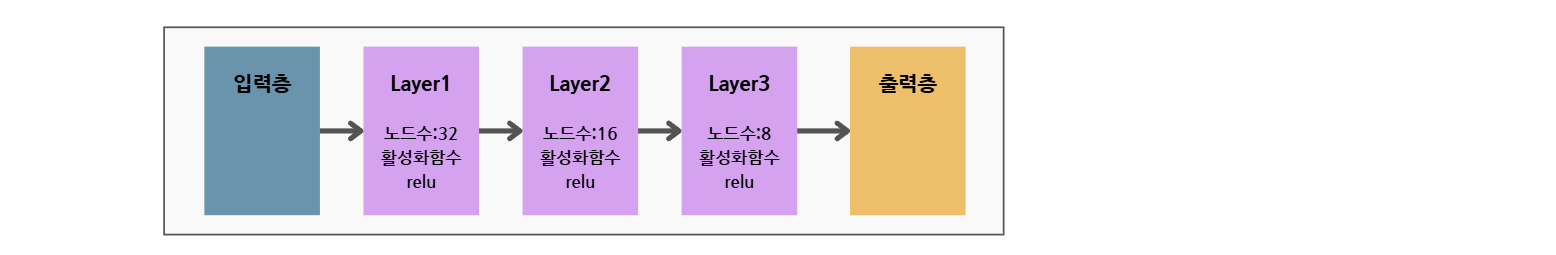

In [ ]:
# 여기에 코드를 작성하세요.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델
model = Sequential()
model.add(Dense(, activation='', input_shape=[]))
model.add(Dense(, activation=''))
model.add(Dense(, activation=''))
model.add(Dense(, activation=''))


## 학습 방법 설정
model.compile(loss='',optimizer='adam',metrics=[''])#------->회귀
hist = model.fit(, , epochs=50 ,batch_size=32, validation_data=(, ))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=[X_train_scaled.shape[1]]))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀


## 학습 방법 설정
model.compile(loss='mse',optimizer='adam',metrics=['mse'])#------->회귀
hist = model.fit(X_train_scaled, y_train, epochs=50 ,batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 23956580.0000 - mse: 23956580.0000 - val_loss: 24581900.0000 - val_mse: 24581900.0000
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22890072.0000 - mse: 22890072.0000 - val_loss: 17722986.0000 - val_mse: 17722986.0000
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12295263.0000 - mse: 12295263.0000 - val_loss: 9382913.0000 - val_mse: 9382913.0000
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6672116.5000 - mse: 6672116.5000 - val_loss: 8290544.5000 - val_mse: 8290544.5000
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4432767.0000 - mse: 4432767.0000 - val_loss: 7753859.5000 - val_mse: 7753859.5000
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4867304.5000 - mse: 4867304.5000 - val_loss: 7431373.5000 - val_mse: 7431373.5000
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6764491.0000 - mse: 6764491.0000 - val_loss: 7263822.5000 - val_mse: 7263822.5000
Epoch 8

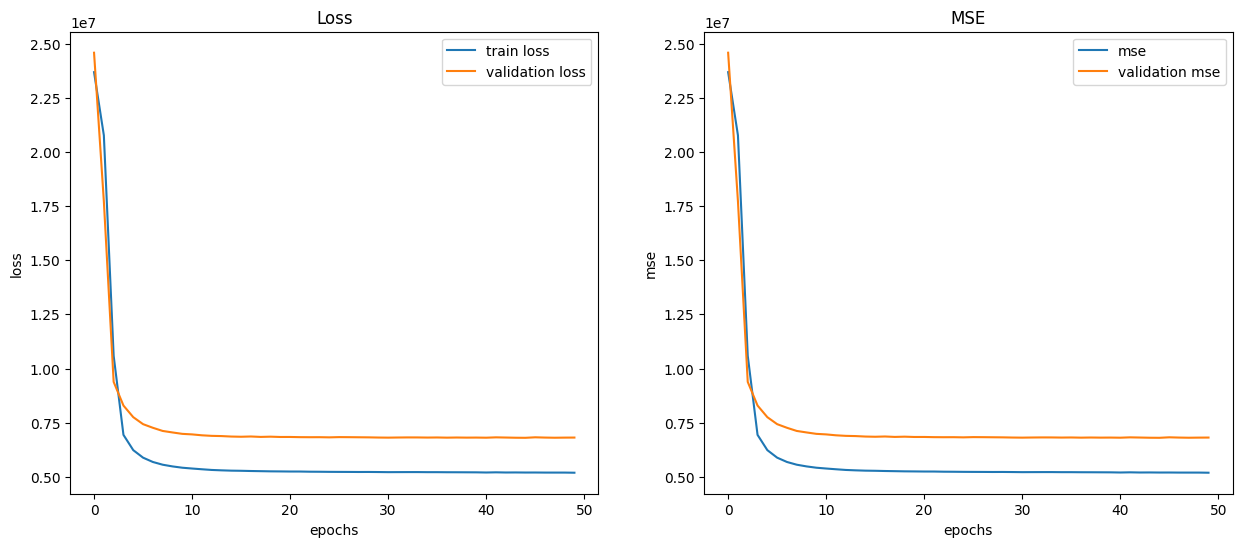

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['mse'],label='mse')
plt.plot(hist.history['val_mse'],label='validation mse')
plt.title('MSE')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()

plt.show()

---

## 🧠**탐구 활동**
### **더 똑똑한 모델은 항상 더 좋은 결과를 낼까?**

우리가 만든 모델의 성능을 최대로 끌어올리기 위해, 뇌의 신경세포(뉴런)를 수십 배로 늘린 **'슈퍼 모델'**을 만들어보면 어떨까요?

뉴런(Nodes): 16개 → 256개

층(Layers): 3개 → 8개

상식적으로는 더 똑똑해진 만큼, 예측도 더 잘해야겠죠?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(0)

# 모델
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=[X_train_scaled.shape[1]]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀


## 학습 방법 설정
model.compile(loss='mse',optimizer='adam',metrics=['mse'])#------->회귀
hist = model.fit(X_train_scaled, y_train, epochs=50 ,batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 16803514.0000 - mse: 16803514.0000 - val_loss: 7010802.0000 - val_mse: 7010802.0000
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4528258.0000 - mse: 4528258.0000 - val_loss: 6889970.0000 - val_mse: 6889970.0000
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4846585.5000 - mse: 4846585.5000 - val_loss: 7001227.0000 - val_mse: 7001227.0000
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4726199.5000 - mse: 4726199.5000 - val_loss: 6799246.0000 - val_mse: 6799246.0000
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6060488.5000 - mse: 6060488.5000 - val_loss: 6941309.5000 - val_mse: 6941309.5000
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4698916.5000 - mse: 4698916.5000 - val_loss: 7195855.5000 - val_mse: 7195855.5000
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5096052.0000 - mse: 5096052.0000 - val_loss: 6830970.5000 - val_mse: 6830970.5000
Epoc

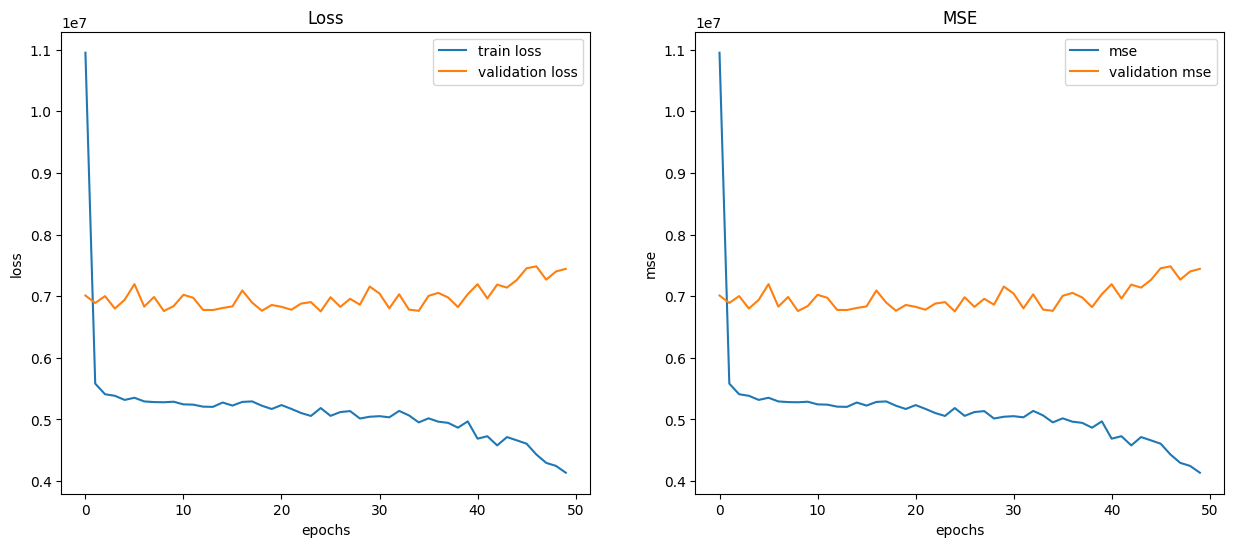

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['mse'],label='mse')
plt.plot(hist.history['val_mse'],label='validation mse')
plt.title('MSE')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()

plt.show()

> **과연 '슈퍼 모델'은 우리의 기대를 채워줄까요?**
> - 그래프를 보면, 놀랍게도 어느 순간부터 **훈련 데이터(loss)**에 대한 평가는 계속 좋아지지만, **검증 데이터(val_loss)**에 대한 평가는 오히려 나빠집니다.
> - 더 똑똑한 모델을 만들었는데, 왜 이런 예상치 못한 함정에 빠지게 된 걸까요?
> - 이것이 바로  머신러닝/딥러닝의 핵심 과제, **과적합(Overfitting)** 현상입니다.